# Exploratory Data Analysis — Stability Tracking

Goal:
Understand patterns and drivers of daily stability over time.

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean visual defaults
sns.set_theme(style="whitegrid")

DATA_PATH = Path("../data/example/habits_example.csv") # Update this path to DATA_PATH = Path("../data/raw/habits.csv")
df = pd.read_csv(DATA_PATH, parse_dates=["date"])

df = df.sort_values("date")
df.head()

,date,clarity,calm,routine,stability,sleep_hours,sleep_quality,exercise_minutes,caffeine_units,social_minutes,stressors,notes
0,2026-02-01,7,7,6,6.7,7.0,3,15,2,30,1,"Decent day, slightly tired."
1,2026-02-02,6,5,6,5.7,6.0,2,0,3,20,2,"More stressed, skipped exercise."
2,2026-02-03,8,8,7,7.7,8.0,4,25,1,45,0,Very steady; good sleep.
3,2026-02-04,5,6,4,5.0,5.5,2,10,2,10,2,Routine slipped; distracted.
4,2026-02-05,7,8,8,7.7,7.5,4,30,1,60,1,Strong routine; calm.


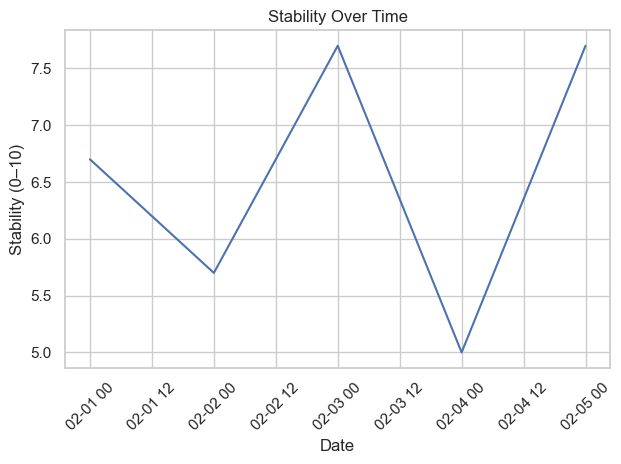

In [6]:
plt.figure()
plt.plot(df["date"], df["stability"])
plt.title("Stability Over Time")
plt.xlabel("Date")
plt.ylabel("Stability (0–10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

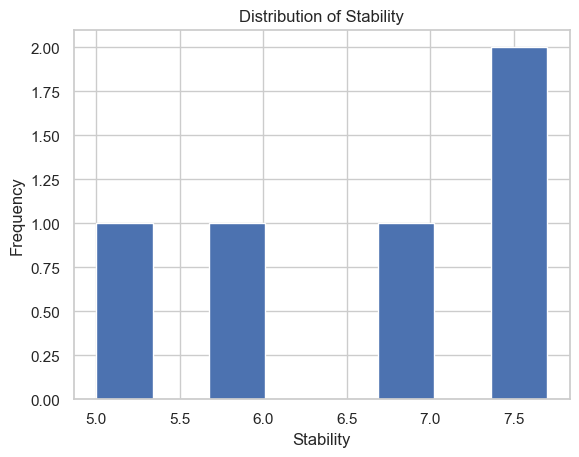

In [7]:
plt.figure()
plt.hist(df["stability"], bins=8)
plt.title("Distribution of Stability")
plt.xlabel("Stability")
plt.ylabel("Frequency")
plt.show()

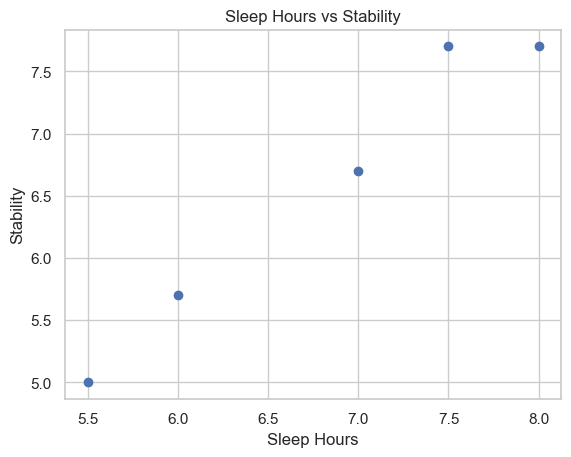

Correlation: 0.9838592831498904


In [8]:
plt.figure()
plt.scatter(df["sleep_hours"], df["stability"])
plt.title("Sleep Hours vs Stability")
plt.xlabel("Sleep Hours")
plt.ylabel("Stability")
plt.show()

print("Correlation:", df["sleep_hours"].corr(df["stability"]))

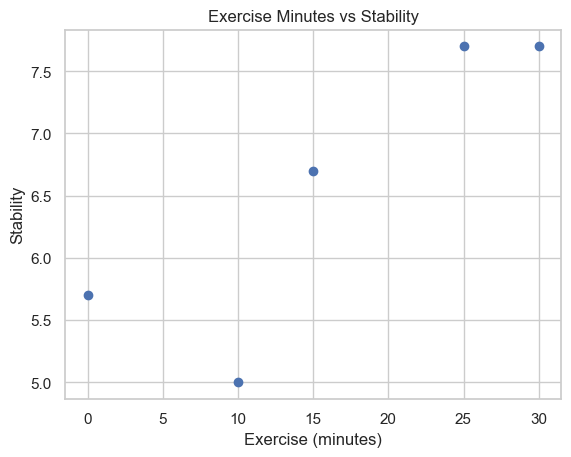

Correlation: 0.8562752639843942


In [9]:
plt.figure()
plt.scatter(df["exercise_minutes"], df["stability"])
plt.title("Exercise Minutes vs Stability")
plt.xlabel("Exercise (minutes)")
plt.ylabel("Stability")
plt.show()

print("Correlation:", df["exercise_minutes"].corr(df["stability"]))

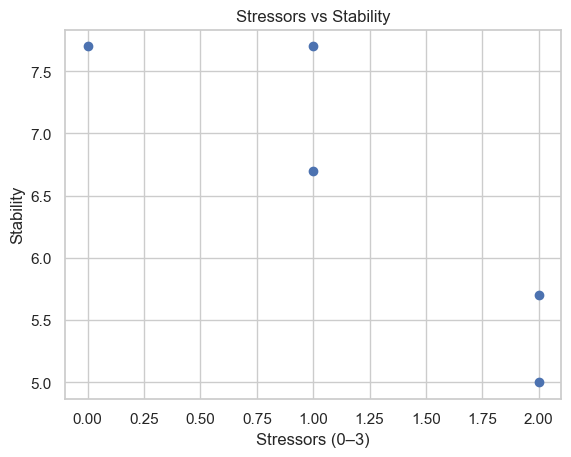

Correlation: -0.8840090390135253


In [10]:
plt.figure()
plt.scatter(df["stressors"], df["stability"])
plt.title("Stressors vs Stability")
plt.xlabel("Stressors (0–3)")
plt.ylabel("Stability")
plt.show()

print("Correlation:", df["stressors"].corr(df["stability"]))

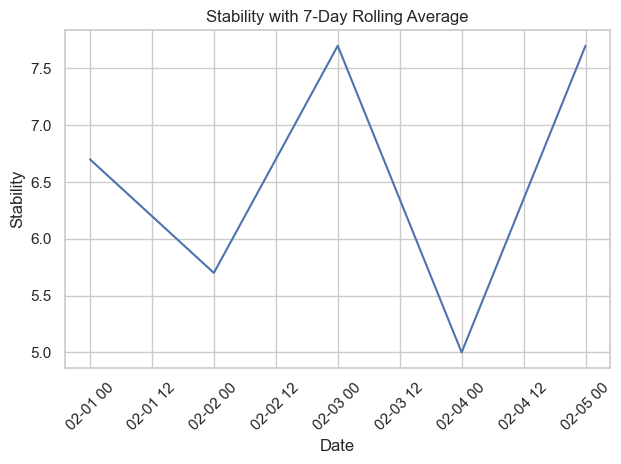

In [11]:
df["stability_7day"] = df["stability"].rolling(window=7).mean()

plt.figure()
plt.plot(df["date"], df["stability"])
plt.plot(df["date"], df["stability_7day"])
plt.title("Stability with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Stability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observations

- Stability appears to increase when sleep > 7 hours.
- Exercise shows mild positive correlation.
- Stressors appear negatively correlated.
- Volatility clusters after low sleep days.

Next steps:
- Add 30+ days of data.
- Test lag effects (sleep today vs stability tomorrow).
- Build simple regression model.